In [388]:
import numpy as np
import pandas as pd
from scipy import linalg
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [523]:
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')[0:-1]) + '/data/'
alldata = pd.read_csv(datadir+'interim/'+'alldata.csv')

In [529]:
alldata.columns = ['Year', 'USState', 'ColoniesFromHoney', 'YieldPerColony',
       'Production', 'StocksDecember', 'AveragePricePerPound',
       'ValueOfProduction', 'AvgQuarterlyColonies', 'MaximumColonies',
       'LostColonies', 'PercentLost', 'AddedColonies', 'RenovatedColonies',
       'PercentRenovated', 'VarroaMites', 'OtherPestsAndParasites', 'Diseases',
       'Pesticides', 'OtherDiseases', 'UnknownDiseases', 'Tavg', 'Prcp',
       'Snow', 'Dp10', 'Evap', 'Awnd']
alldata.shape

(123, 27)

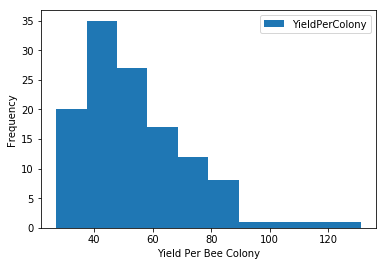

In [525]:
ax = plt.gca()
alldata[['YieldPerColony']].plot.hist(bins=10,ax=ax)
plt.xlabel('Yield Per Bee Colony');

In [98]:
alldata[['YieldPerColony']].describe()

,YieldPerColony
count,123.000000
mean,53.894309
std,18.302921
min,27.000000
25%,40.500000
50%,50.000000
75%,65.500000
max,131.000000


In [526]:
bins = [0, 40.5, 50, 65.5, 200]
names = [0, 1, 2, 3, 4]
d = dict(enumerate(names, 1))
alldata['YieldClass'] = np.vectorize(d.get)(np.digitize(alldata['YieldPerColony'], bins))
alldata = alldata.drop(['YieldPerColony'],1)

In [530]:
alldata.to_csv(datadir+'processed/'+'completeddata.csv')
alldata.head()

,Year,USState,ColoniesFromHoney,YieldPerColony,Production,StocksDecember,AveragePricePerPound,ValueOfProduction,AvgQuarterlyColonies,MaximumColonies,...,Diseases,Pesticides,OtherDiseases,UnknownDiseases,Tavg,Prcp,Snow,Dp10,Evap,Awnd
0,2015,Alabama,7,329,13,383,1260,7750.0,7875.0,1167.5,...,3.300,2.650,8.750,64.322539,5.197872,0.560711,7.200654,4.605455,5.387887,1
1,2015,Arizona,26,1274,306,203,2586,36000.0,36750.0,7025.0,...,12.150,10.700,7.025,59.430670,1.222873,0.792900,3.033844,7.156250,7.419191,1
2,2015,Arkansas,24,1728,121,206,3560,18125.0,21125.0,3700.0,...,9.075,9.900,4.850,61.145090,5.627300,0.586853,6.626344,4.069028,5.922277,3
3,2015,California,275,8250,1485,203,16748,990000.0,1200000.0,146000.0,...,16.725,12.025,4.850,59.962052,1.268527,0.780166,2.383932,6.381611,6.058473,0
4,2015,Colorado,29,1479,399,226,3343,17125.0,22875.0,2600.0,...,9.825,4.625,2.825,44.767395,1.918909,5.970044,5.259078,6.182575,8.548830,2


In [517]:
data_no_state_year = alldata.drop(['Year','USState','YieldPerColony'],1)
data_no_state_year.head()

,ColoniesFromHoney,Production,StocksDecember,AveragePricePerPound,ValueOfProduction,AvgQuarterlyColonies,MaximumColonies,LostColonies,PercentLost,AddedColonies,...,Pesticides,OtherDiseases,UnknownDiseases,Tavg,Prcp,Snow,Dp10,Evap,Awnd,YieldClass
0,7,329,13,383,1260,7750.0,7875.0,1167.5,15.50,1235.0,...,3.300,2.650,8.750,64.322539,5.197872,0.560711,7.200654,4.605455,5.387887,1
1,26,1274,306,203,2586,36000.0,36750.0,7025.0,19.00,7550.0,...,12.150,10.700,7.025,59.430670,1.222873,0.792900,3.033844,7.156250,7.419191,1
2,24,1728,121,206,3560,18125.0,21125.0,3700.0,16.00,3775.0,...,9.075,9.900,4.850,61.145090,5.627300,0.586853,6.626344,4.069028,5.922277,3
3,275,8250,1485,203,16748,990000.0,1200000.0,146000.0,11.75,124750.0,...,16.725,12.025,4.850,59.962052,1.268527,0.780166,2.383932,6.381611,6.058473,0
4,29,1479,399,226,3343,17125.0,22875.0,2600.0,11.25,2750.0,...,9.825,4.625,2.825,44.767395,1.918909,5.970044,5.259078,6.182575,8.548830,2


In [103]:
# Data_Train = data_no_state[data_no_state['Unnamed: 0'] <= 2016].drop('Unnamed: 0',1)
# Data_Test = data_no_state[data_no_state['Unnamed: 0'] == 2016].drop('Unnamed: 0',1)

In [503]:
normalized_data=(data_no_state_year-data_no_state_year.mean())/data_no_state_year.std()
corrmatrix = normalized_data.corr().abs()

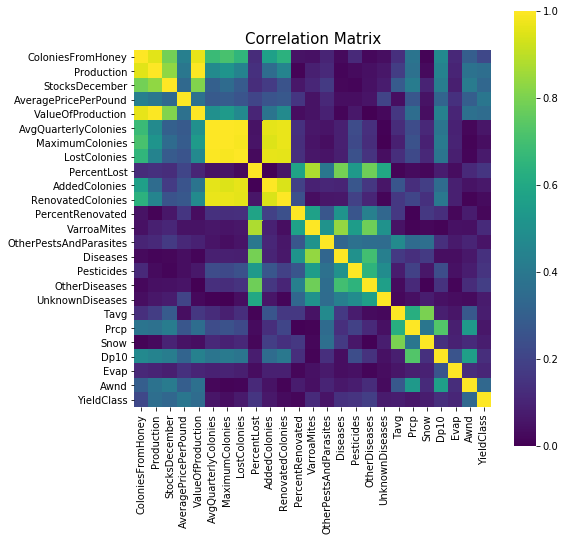

In [504]:
def plotCorr(df,title="Correlation Matrix",annot=None):
    fig, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(df, annot = annot, vmin=0, vmax=1, fmt="s", cmap='viridis',square=True)
    ax.set_title(title,fontsize=15)

plotCorr(corrmatrix)
plt.savefig('CorrMatrix.png', bbox_inches='tight')

In [505]:
corrmatrix_half = corrmatrix.where(np.triu(np.ones(corrmatrix.shape)).astype(np.bool))
reduced_by_corr = corrmatrix_half.stack().sort_values(ascending=False)[len(data_no_state_year.columns):50].drop_duplicates()
reduced_matrix = reduced_by_corr.unstack()
reduced_matrix.shape

(12, 12)

In [506]:
from scipy.stats import pearsonr
def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues

pval = calculate_pvalues(data_no_state_year)

reduced_pval = pd.DataFrame(columns=reduced_matrix.columns,index=reduced_matrix.index)
for i in reduced_matrix.index:
    for j in reduced_matrix.columns:
        reduced_pval.loc[i,j] = pval.loc[j,i]

reduced_pval = reduced_pval.mask(reduced_pval<0.01,'<.01')
reduced_pval.shape

(12, 12)

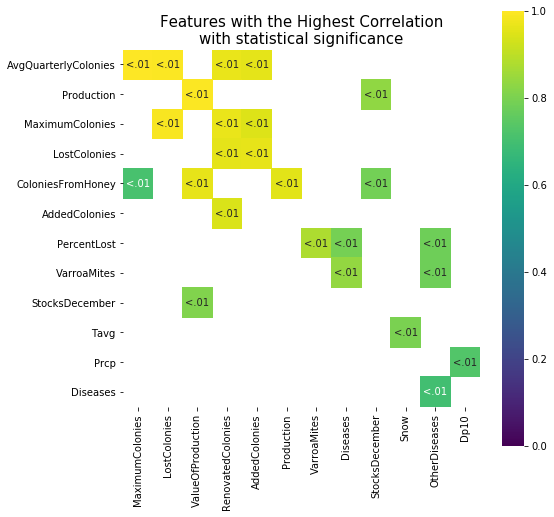

In [507]:
plotCorr(reduced_by_corr.unstack(),'Features with the Highest Correlation\nwith statistical significance',reduced_pval)
plt.savefig('CorrFigwithStatsSig.png', bbox_inches='tight')